<a href="https://colab.research.google.com/github/camilafaiza26/kelompok8_project_1/blob/main/Mutiple_Regresi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Membaca the dataset
dataset = pd.read_csv("Real estate.csv")

In [3]:
#Menampilkan dataset baris awal
dataset.head()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


In [13]:
#Menetapkan nilai untuk X dan Y
x = dataset[['X1 transaction date','X2 house age', 'X3 distance to the nearest MRT station', 'X4 number of convenience stores', 'X5 latitude', 'X6 longitude']]
y = dataset['Y house price of unit area']

In [14]:
#Splitting dataset
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 100)

In [15]:
#instal linear Regresi
!pip install LinearRegression

In [16]:
#Fitting the Multiple Linear Regression model
from sklearn.linear_model import LinearRegression
mlr = LinearRegression()  
mlr.fit(x_train, y_train)

LinearRegression()

In [17]:
#Intercept and Coefficient
print("Intercept: ", mlr.intercept_)
print("Coefficients:")
list(zip(x, mlr.coef_))

Intercept:  -11427.249965741245
Coefficients:


[('X1 transaction date', 6.463479331409905),
 ('X2 house age', -0.2883333969953181),
 ('X3 distance to the nearest MRT station', -0.005133368305334729),
 ('X4 number of convenience stores', 1.0539290267583272),
 ('X5 latitude', 192.35174319761433),
 ('X6 longitude', -52.18995125599965)]

In [18]:
#Prediction of test set
y_pred_mlr= mlr.predict(x_test)
#Predicted values
print("Prediction for test set: {}".format(y_pred_mlr))

Prediction for test set: [44.84788004 37.84746165 54.13232869 38.95220752 48.81071028 28.23144929
 43.43296166 48.81071028 51.75419453 31.1228255  36.68180466 47.47368836
 40.81644705 32.85207546 47.89225883 40.61850576 55.29047499 43.58100227
 35.50320487 28.89756209 13.28146629 41.67279456 31.97200418 44.65135475
 27.69619094 32.78479    19.39758877 36.29956808 39.9952593  41.17466846
 54.91745513 36.20156374 39.42877817 45.40138629 26.90508364 47.23811381
 37.89756402 16.38931208 42.46303068 48.10951765 47.16489998 46.26540097
 35.85428099 33.45327716 40.89775381 46.45195399 39.79272677 33.09439548
 43.91474848 46.23899865 43.55189444 31.26389248 41.18063497 41.99978432
 52.29712679 46.5818074  48.44076851 32.46037613 47.35729818 32.38046496
 39.33844955 49.29257506 49.93572757 37.73110408 45.85524443 43.38690036
 46.87698794 47.59392291 36.34838747 52.34096309  6.9691363  34.87651231
 47.47368836 45.86083098 47.41903414 33.77082267 44.8313141  31.4836231
 42.57519682 20.45326124 43

In [19]:
#Actual value and the predicted value
mlr_diff = pd.DataFrame({'Actual value': y_test, 'Predicted value': y_pred_mlr})
mlr_diff.head()

,Actual value,Predicted value
121,48.0,44.847880
353,31.3,37.847462
96,59.5,54.132329
43,34.1,38.952208
125,48.6,48.810710


In [20]:
#Model Evaluation
from sklearn import metrics
meanAbErr = metrics.mean_absolute_error(y_test, y_pred_mlr)
meanSqErr = metrics.mean_squared_error(y_test, y_pred_mlr)
rootMeanSqErr = np.sqrt(metrics.mean_squared_error(y_test, y_pred_mlr))
print('R squared: {:.2f}'.format(mlr.score(x,y)*100))
print('Mean Absolute Error:', meanAbErr)
print('Mean Square Error:', meanSqErr)
print('Root Mean Square Error:', rootMeanSqErr)

R squared: 57.94
Mean Absolute Error: 5.561929878558203
Mean Square Error: 49.20058900578788
Root Mean Square Error: 7.014313152817451


Text(0.5, 1.0, 'Actual vs Predicted')

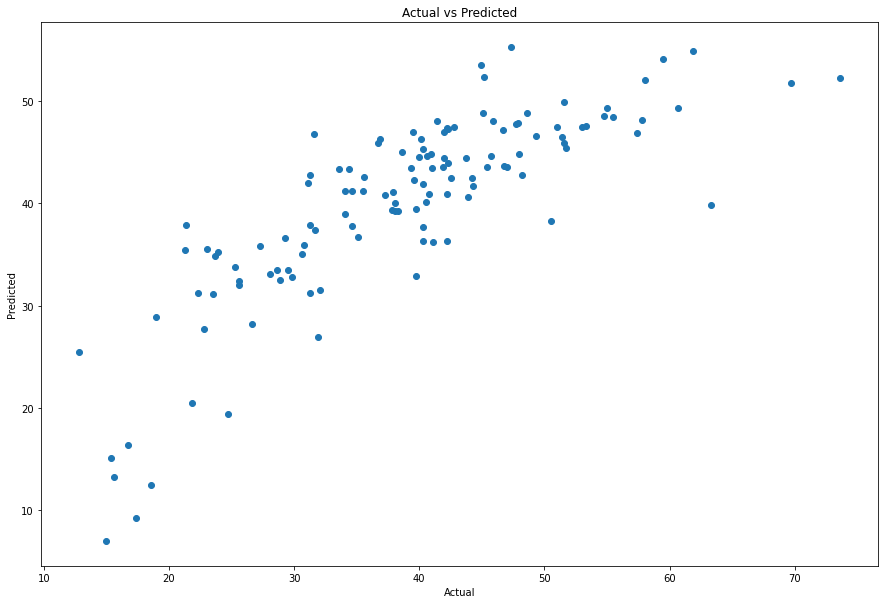

In [21]:
#Grafil
plt.figure(figsize=(15,10))
plt.scatter(y_test,y_pred_mlr)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')